# 《人工神经网络理论、设计及应用》代码实践-第三章 单层感知机
<hr>

<center>离散型单层感知机采用符号输出函数时的输出计算公式</center>
$$O_j=sgn(net_j^{'}-T_j)=sgn(\sum_{i=0}^{n}w_{ij}*x_{i})=sgn(W_j^T*X)$$

## 本章需要安装的第三方包：

- pytorch（可以从官网生成适合自己操作系统、硬件的安装语句 https://pytorch.org/get-started/locally/
- 本机没有GPU情况下，执行以下安装语句，需要restart kernel。
```shell
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
```


### 3.2 单节点感知器的功能分析

#### Page44中图3.4“与”逻辑神经元的代码实现

In [2]:
# Page44中图3.4“与”逻辑神经元的代码实现，扩展了OR、NAND两个逻辑
# 同样的算法，不同的权值、偏置就能实现三个不同逻辑的输入、输出映射

def sgn(x):
    return 1 if x>0 else 0 #这里采用0、1输出，而不是前面的-1、1输出
        
print()
print("---------------------AND---------------------")
w0,w1 = 0.5,0.5
bias= 0.75

# 以下代码中四个输入其实都是重复使用同一个算式：sgn(x0*w0+x1*w1-bias)。
x0,x1 = 0.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out1:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 0.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out2:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out3:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out4:",sgn(x0*w0+x1*w1-bias))

# 以下扩展了几个其它逻辑，算法完全相同，证明权值、偏置值不同，相同网络结构、计算方法可以反映不同逻辑响应。
print()
print("---------------------OR---------------------")
w0,w1 = 0.5,0.5
bias = 0.25

x0,x1 = 0.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out1:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 0.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out2:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out3:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out4:",sgn(x0*w0+x1*w1-bias))

print()
print("---------------------NAND---------------------")
w0,w1 = -0.5,-0.5
bias = -0.75

x0,x1 = 0.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out1:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 0.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out2:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,0.0
print("input x0、x1:",x0,x1,end='')
print("  out3:",sgn(x0*w0+x1*w1-bias))

x0,x1 = 1.0,1.0
print("input x0、x1:",x0,x1,end='')
print("  out4:",sgn(x0*w0+x1*w1-bias))


---------------------AND---------------------
input x0、x1: 0.0 0.0  out1: 0
input x0、x1: 0.0 1.0  out2: 0
input x0、x1: 1.0 0.0  out3: 0
input x0、x1: 1.0 1.0  out4: 1

---------------------OR---------------------
input x0、x1: 0.0 0.0  out1: 0
input x0、x1: 0.0 1.0  out2: 1
input x0、x1: 1.0 0.0  out3: 1
input x0、x1: 1.0 1.0  out4: 1

---------------------NAND---------------------
input x0、x1: 0.0 0.0  out1: 1
input x0、x1: 0.0 1.0  out2: 1
input x0、x1: 1.0 0.0  out3: 1
input x0、x1: 1.0 1.0  out4: 0


#### Page44中图3.4“与”逻辑神经元的代码实现（numpy数组方式、点积计算）

In [3]:
# Page44中图3.4“与”逻辑神经元的代码实现（numpy数组方式、点积计算）
# 相比前面代码更简明、灵活

import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
bias = 0.0
W = np.array([0.5,0.5])

def sgn(x):
    return (x>0).astype(int) #较前面代码，为了一次返回多个结果，进行了写法修改，逻辑相同
        
print()
print("---------------------AND---------------------")
bias = 0.75
print("input X:\n",X)
print("outputs:",sgn(np.dot(W,X.T)-bias))

print()
print("---------------------OR---------------------")
bias = 0.25
print("input X:\n",X)
print("outputs:",sgn(np.dot(W,X.T)-bias))

print()
print("---------------------NAND---------------------")
W = np.array([-0.5,-0.5])
bias = - 0.75
print("input X:\n",X)
print("outputs:",sgn(np.dot(W,X.T)-bias))



---------------------AND---------------------
input X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
outputs: [0 0 0 1]

---------------------OR---------------------
input X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
outputs: [0 1 1 1]

---------------------NAND---------------------
input X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
outputs: [1 1 1 0]


#### Page44 3.4,单层感知机解决AND、OR、NAND问题时的二维权值超平面移动可视化

In [ ]:
# Page44中图3.4“与”逻辑神经元的代码实现，可以手动调节权值、偏置，可视化观察权值超平面移动对于输入数据集的空间分隔

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap
%matplotlib qt5

# 定义感知器类
class Perceptron:
    def __init__(self, weights=np.array([0.0, 0.0]), bias=0.0):
        self.weights = weights
        self.bias = bias
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
    
    def decision_boundary(self, x):
        """返回给定x值对应的决策边界y值"""
        if self.weights[1] == 0:  # 防止除以零
            return None
        return (-self.weights[0] * x - self.bias) / self.weights[1]

# 创建AND逻辑门的数据点
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# 初始化感知器
p = Perceptron(weights=np.array([1.0, 1.0]), bias=-1.5)

# 设置颜色映射
cmap = ListedColormap(['red', 'blue'])

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.25, bottom=0.35)

# 绘制数据点及其标签
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker='o', edgecolor='k', s=100)
for i, point in enumerate(X):
    ax.text(point[0] + 0.05, point[1] + 0.05, f'({point[0]}, {point[1]})', fontsize=9, ha='center')

# 绘制初始决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = p.decision_boundary(xx)
if yy is not None:
    line, = ax.plot(xx, yy, 'r--', lw=2, label='Decision Boundary')

# 使用 quiver 绘制初始权重向量箭头
weight_vector = ax.quiver(0, 0, p.weights[0], p.weights[1], angles='xy', scale_units='xy', scale=1, color='green', label='Weight Vector')

# 设置图表属性
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')  # 设置坐标轴比例为1:1
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_title('Perceptron for AND_OR_NAND Logic Gate')
ax.legend()
ax.grid(True)

# 创建滑动条轴
ax_w1 = plt.axes([0.25, 0.2, 0.65, 0.03])
ax_w2 = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03])

# 创建滑动条
s_w1 = Slider(ax_w1, 'Weight 1', -3.0, 3.0, valinit=p.weights[0], valstep=0.1)
s_w2 = Slider(ax_w2, 'Weight 2', -3.0, 3.0, valinit=p.weights[1], valstep=0.1)
s_b = Slider(ax_b, 'Bias', -3.0, 3.0, valinit=p.bias, valstep=0.1)

def update(val):
    w1 = s_w1.val
    w2 = s_w2.val
    b = s_b.val
    
    # 更新感知器参数
    p.weights = np.array([w1, w2])
    p.bias = b
    
    # 更新决策边界
    yy = p.decision_boundary(xx)
    if yy is not None:
        line.set_ydata(yy)
    
    # 更新权重向量箭头
    weight_vector.set_UVC(w1, w2)  # 更新箭头的方向
    
    # 更新数据点颜色
    predictions = p.predict(X)
    scatter.set_array(predictions)
    
    fig.canvas.draw_idle()

# 将更新函数绑定到滑动条
s_w1.on_changed(update)
s_w2.on_changed(update)
s_b.on_changed(update)

plt.show()

#### Page45 例3.1的代码实现

请输入权值和偏置的初始值（例如，权值: [0, 0]，偏置: 0）


权值（以逗号分隔，例如 0,0）:  -1,0
偏置:  -0.5


初始权值: [-1.  0.]
初始偏置: -0.5
初始参数已经能够正确分类所有样本，无需训练。


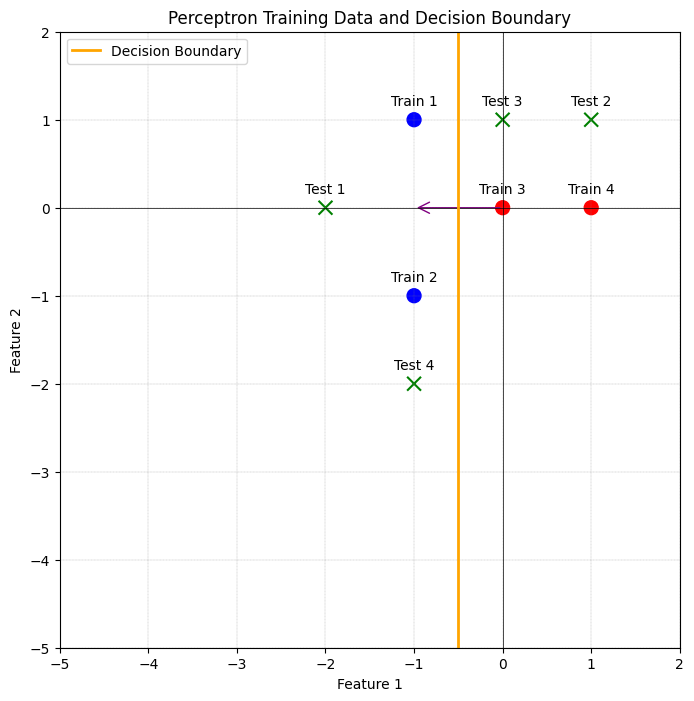

训练后的权值与偏置： 权值: [-1.  0.] 偏置: -0.5


In [1]:
# Page45 例3.1的代码实现
# 书中手动输入的权值是：-1,0 偏置是0.5,在这个程序里由于训练代码写法差异偏置需要修改为-0.5

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# 给定的数据
X = np.array([[-1, 1], [-1, -1], [0, 0], [1, 0]])  # 输入数据
Y = np.array([1, 1, -1, -1])  # 指导数据（标签），修正了标签数量以匹配输入数量
Test = np.array([[-2, 0], [1, 1], [0, 1], [-1, -2]])  # 测试数据

# 允许用户手动设定权值和偏置
def initialize_parameters():
    print("请输入权值和偏置的初始值（例如，权值: [0, 0]，偏置: 0）")
    W_input = input("权值（以逗号分隔，例如 0,0）: ")
    bias_input = input("偏置: ")
    
    # 将输入转换为数值
    W = np.array([float(w) for w in W_input.split(',')])
    bias = float(bias_input)
    
    return W, bias

# 检查初始参数是否能够正确分类所有样本
def check_initial_parameters(X, Y, W, bias):
    all_correct = True
    for i, x in enumerate(X):
        net_input = np.dot(x, W) + bias
        prediction = 1 if net_input > 0 else -1
        if prediction != Y[i]:
            all_correct = False
            break
    return all_correct

# 初始化参数
W, bias = initialize_parameters()
print("初始权值:", W)
print("初始偏置:", bias)

# 检查初始参数是否已经能够正确分类所有样本
if check_initial_parameters(X, Y, W, bias):
    print("初始参数已经能够正确分类所有样本，无需训练。")
else:
    print("初始参数未能正确分类所有样本，开始训练...")
    learning_rate = 1  # 学习率设置为1，因为这是感知器的标准学习规则

    # 激活函数（阶跃函数）
    def activation_function(z):
        return 1 if z > 0 else -1

    # 训练函数
    def train_perceptron(X, Y, W, bias, learning_rate, epochs=100):
        for epoch in range(epochs):
            all_correct = True
            for i, x in enumerate(X):
                net_input = np.dot(x, W) + bias
                prediction = activation_function(net_input)
                if prediction != Y[i]:
                    all_correct = False
                    update = learning_rate * (Y[i] - prediction)
                    W += update * x
                    bias += update
            if all_correct:
                print(f"所有样本在第 {epoch + 1} 轮中均正确分类，提前结束训练")
                break
        return W, bias

    # 开始训练
    W, bias = train_perceptron(X, Y, W, bias, learning_rate)

# 准备绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-5, 2])
ax.set_ylim([-5, 2])
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.2)

# 绘制训练数据点
colors = ['blue' if yi == 1 else 'red' for yi in Y]
scatter = ax.scatter(X[:, 0], X[:, 1], c=colors, marker='o', s=100)

# 标注训练数据点的编号和序号
for i, txt in enumerate(['Train 1', 'Train 2', 'Train 3', 'Train 4']):
    ax.annotate(txt, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制测试数据点
test_colors = ['green'] * len(Test)
test_scatter = ax.scatter(Test[:, 0], Test[:, 1], c=test_colors, marker='x', s=100)

# 标注测试数据点的编号和序号
for i, txt in enumerate(['Test 1', 'Test 2', 'Test 3', 'Test 4']):
    ax.annotate(txt, (Test[i, 0], Test[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制超平面
x_values = np.linspace(-3, 2, 100)
if W[1] != 0:
    y_values = (-W[0] * x_values - bias) / W[1]
else:
    # 当 W[1] = 0 时，超平面是一条垂直于 x 轴的直线
    x_values = np.full_like(x_values, -bias / W[0])  # x = -b / W[0]
    y_values = np.linspace(-5, 2, 100)  # y 可以是任意值
ax.plot(x_values, y_values, color='orange', lw=2, label='Decision Boundary')

# 绘制权值向量箭头
arrow = FancyArrowPatch((0, 0), (W[0], W[1]), mutation_scale=20, arrowstyle='->', color='purple')
ax.add_patch(arrow)

# 添加图例
plt.legend()
plt.title('Perceptron Training Data and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# 打印训练后的权值和偏置
print("训练后的权值与偏置：", "权值:", W, "偏置:", bias)

#### Page46 例3.2的代码实现（增加了两个神经元权值向量和垂直于它们的超平面关系可视化）

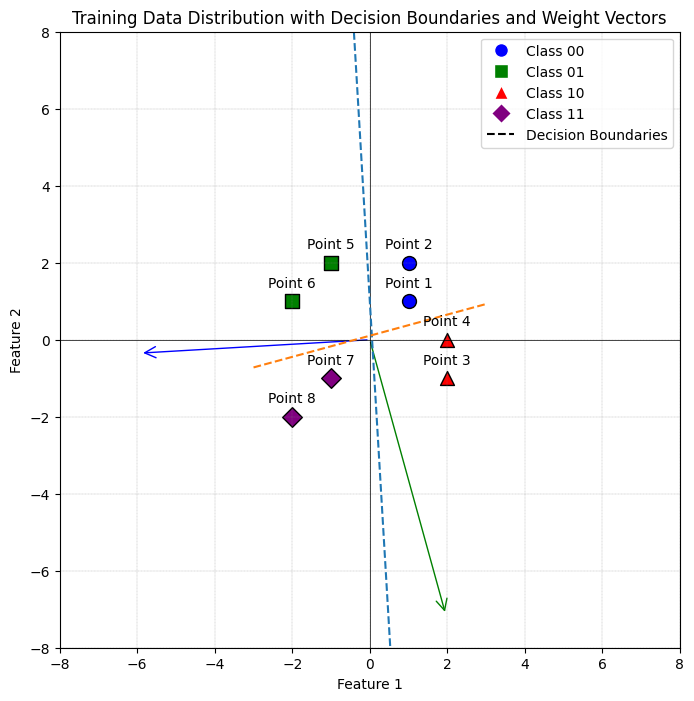

训练后的权值与偏置：
神经元 1: 权值: [-5.92137322 -0.34745301], 偏置: 0.35278045770878474
神经元 2: 权值: [ 1.95963772 -7.13927167], 偏置: 0.7399380304388925


In [2]:
# Page46 例3.2（增加了两个神经元权值向量和垂直于它们的超平面关系可视化）

# 可以看出，输入数据被两个神经元的两个超平面分隔成了4各区域，符合书中说M个同一层神经元可以分类2的M次方个类别。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# 给定的数据
X = np.array([[1, 1], [1, 2], [2, -1], [2, 0], [-1, 2], [-2, 1], [-1, -1], [-2, -2]])
Y_binary = np.array([[0,0],[0,0],[0,1],[0,1],[1,0],[1,0],[1,1],[1,1]])  # 二进制编码的标签

# 初始化参数
num_neurons = Y_binary.shape[1]  # 使用两个神经元
W = np.zeros((num_neurons, X.shape[1]))  # 每个神经元的权值初始化为零
bias = np.zeros(num_neurons)  # 每个神经元的偏置初始化为零
learning_rate = 0.1  # 设置学习率为0.1

# 激活函数（Sigmoid函数）
def activation_function(z):
    return 1 / (1 + np.exp(-z))

# 训练函数（针对每个输出维度的二分类问题）
def train_logistic_regression(X, Y_class, W_class, bias_class, learning_rate, epochs=1000):
    for epoch in range(epochs):
        for i, x in enumerate(X):
            z = np.dot(W_class, x) + bias_class
            prediction = activation_function(z)
            error = prediction - Y_class[i]
            update = learning_rate * error
            W_class -= update * x
            bias_class -= update
    return W_class, bias_class

# 对每个输出维度训练逻辑回归
for neuron_idx in range(num_neurons):
    W[neuron_idx], bias[neuron_idx] = train_logistic_regression(X, Y_binary[:, neuron_idx], W[neuron_idx], bias[neuron_idx], learning_rate)

# 准备绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.2)

# 定义类别到颜色和形状的映射
color_map = ['blue', 'green', 'red', 'purple']
marker_map = ['o', 's', '^', 'D']  # 圆形、正方形、三角形、菱形

# 将二进制编码转换为类别索引 (00 -> 0, 01 -> 1, 10 -> 2, 11 -> 3)
Y_labels = np.dot(Y_binary, [1, 2])

# 绘制数据点
for i in range(len(X)):
    ax.scatter(X[i, 0], X[i, 1], c=color_map[Y_labels[i]], s=100, edgecolors='k', marker=marker_map[Y_labels[i]])
    ax.annotate(f'Point {i+1}', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制每个神经元的超平面和权值向量
x_values = np.linspace(-3, 3, 100)
for neuron_idx in range(num_neurons):
    W_neuron = W[neuron_idx]
    bias_neuron = bias[neuron_idx]

    # 绘制超平面
    if W_neuron[1] != 0:
        y_values = (-W_neuron[0] * x_values - bias_neuron) / W_neuron[1]
    elif W_neuron[0] != 0:
        y_values = np.full_like(x_values, -bias_neuron/W_neuron[0])
    else:
        y_values = np.full_like(x_values, 0)  # 如果权重都是0，默认为水平线
    ax.plot(x_values, y_values, label=f'Decision Boundary Neuron {neuron_idx+1}', linestyle='--')

    # 绘制权值向量箭头
    arrow = FancyArrowPatch((0, 0), (W_neuron[0], W_neuron[1]), mutation_scale=20, 
                            arrowstyle='->', color=color_map[neuron_idx])
    ax.add_patch(arrow)

# 添加图例
legend_elements = [plt.Line2D([0], [0], marker=marker_map[i], color='w', label=f'Class {format(i, "02b")}',
                              markerfacecolor=color_map[i], markersize=10) for i in range(len(color_map))]
ax.legend(handles=legend_elements + [plt.Line2D([0], [0], linestyle='--', color='black', label='Decision Boundaries')])

plt.title('Training Data Distribution with Decision Boundaries and Weight Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# 打印训练后的权值和偏置
print("训练后的权值与偏置：")
for i in range(num_neurons):
    print(f"神经元 {i+1}: 权值: {W[i]}, 偏置: {bias[i]}")

### 3.3 感知器的学习算法

#### Page47 例3.3计算过程的代码实现

In [7]:
# Page47 例3.3计算过程代码实现

import numpy as np
from IPython.display import Math #支持输出内容中的数序符号渲染

#输入数据
x1=np.array([-1,1,-2,0])
x2=np.array([-1,0,1.5,-0.5])
x3=np.array([-1,-1,1,0.5])
# 指导数据
d1=np.array([-1])
d2=np.array([-1])
d3=np.array([1])

# 学习率
lr=0.1
# 初始权重
W=np.array([0.5,1,-1,0])

# step 1
WX1=np.dot(W,x1)
display(Math(fr'W^T(0)X^1={WX1:.1f}'))# 为了显示数学符号，采用了支持数学符号渲染的方法，根本上只是要打印WX1的值（也就是权重和输入向量的点积）
o1=np.sign(WX1)
print("O1(0):",o1)
W+=lr*(d1-o1)*x1
print("W(1):",W)
print()

# step 2
WX2=np.dot(W,x2)
display(Math(fr'W^T(0)X^1={WX2:.1f}'))
o2=np.sign(WX2)
print("O1(1):",o1)
W+=lr*(d2-o2)*x2
print("W(2):",W)
print()

# step 3
WX3=np.dot(W,x3)
display(Math(fr'W^T(0)X^1={WX3:.1f}'))
o3=np.sign(WX3)
print("O1(2):",o3)
W+=lr*(d3-o3)*x3
print("W(3):",W)
print()

# step 4
#......

<IPython.core.display.Math object>

O1(0): 1.0
W(1): [ 0.7  0.8 -0.6  0. ]



<IPython.core.display.Math object>

O1(1): 1.0
W(2): [ 0.7  0.8 -0.6  0. ]



<IPython.core.display.Math object>

O1(2): -1.0
W(3): [ 0.5  0.6 -0.4  0.1]



#### 上面逻辑的验证程序-连续求解直到符合全部期望

In [8]:
# 上面逻辑的验证程序-连续求解直到符合全部期望

import numpy as np
from IPython.display import display, HTML

np.set_printoptions(precision=3, suppress=True)  # 为防止计算过程中精度导致的输出位数过长，suppress=True 防止科学记数法

# 输入数据
X = np.array([
    [-1, 1, -2, 0],   # x1
    [-1, 0, 1.5, -0.5], # x2
    [-1, -1, 1, 0.5]  # x3
])

# 指导数据
D = np.array([-1, -1, 1])  # d1, d2, d3

# 学习率
lr = 0.1

# 初始权重
W = np.array([0.5, 1, -1, 0])

def train_perceptron(X, D, W, lr):
    epoch = 0
    error = True

    while error:
        error = False
        for i in range(len(D)):
            WX = np.dot(W, X[i])
            o = np.sign(WX)
            if o != D[i]:
                error = True
                delta_W = lr * (D[i] - o) * X[i]
                ##print(f'Epoch {epoch}: Update weights with delta_W: {delta_W}')
                display(HTML(f'<span style="color: #888888;">Epoch {epoch}: Update weights with delta_W: {delta_W}</span>'))
                W += delta_W
                print(f'Updated weights: {W}')
                print("-----------------------------------------------------------")
        
        epoch += 1
        if not error:
            print(f'Training completed in {epoch} epochs.')
            break
        elif epoch > 100:  # 防止无限循环，设置最大迭代次数
            print('Training did not converge within the maximum number of epochs.')
            break

train_perceptron(X, D, W, lr)

# 测试训练后的权重
for i in range(len(D)):
    WX = np.dot(W, X[i])
    o = np.sign(WX)
    print(f"Input {i+1}, Output: {o}, Expected: {D[i]}")

Updated weights: [ 0.7  0.8 -0.6  0. ]
-----------------------------------------------------------


Updated weights: [ 0.5  0.6 -0.4  0.1]
-----------------------------------------------------------


Updated weights: [0.7 0.4 0.  0.1]
-----------------------------------------------------------


Updated weights: [0.5 0.2 0.2 0.2]
-----------------------------------------------------------


Updated weights: [0.3 0.  0.4 0.3]
-----------------------------------------------------------


Updated weights: [0.5 0.  0.1 0.4]
-----------------------------------------------------------


Updated weights: [ 0.3 -0.2  0.3  0.5]
-----------------------------------------------------------
Training completed in 5 epochs.
Input 1, Output: -1.0, Expected: -1
Input 2, Output: -1.0, Expected: -1
Input 3, Output: 1.0, Expected: 1


#### 能够自动学习的单层感知机，通过训练建立AND、OR、NAND逻辑反应能力

In [12]:
# 二维输入的单节点感知器处理AND、OR、NAND逻辑响应。
# 同样的程序，用不同期望值训练自动改变权重、偏置后，同一个网络实现了不同的数据响应能力。

import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # 初始化权重和偏置
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 迭代训练
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # 计算线性组合
                linear_output = np.dot(x_i, self.weights) + self.bias
                # 激活函数（阶跃函数）
                y_predicted = self._unit_step_function(linear_output)

                # 更新权重和偏置
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_function(linear_output)
        return y_predicted

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

if __name__ == "__main__":
    # 4组2维输入数据
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    y = np.array([0, 0, 0, 1])  # AND 逻辑对应各输入的期望输出
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)
    print("----------------AND逻辑响应----------------")
    print(f"训练后的权重、偏置：{p.weights}{p.bias:.3f}")
    print("输入数据:\n", X)
    print("期望结果:", y)
    print("推理结果:", p.predict(X))

    y = np.array([0, 1, 1, 1])  # OR 逻辑对应各输入的期望输出
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)
    print("----------------OR逻辑响应----------------")
    print(f"训练后的权重、偏置：{p.weights},{p.bias:.3f}")
    print("输入数据:\n", X)
    print("期望结果:", y)
    print("推理结果:", p.predict(X))

    y = np.array([1, 1, 1, 0])  # NAND 逻辑对应各输入的期望输出
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)
    print("----------------NAND逻辑响应----------------")
    print(f"训练后的权重、偏置：{p.weights},{p.bias:.3f}")
    print("输入数据:\n", X)
    print("期望结果:", y)
    print("推理结果:", p.predict(X))

----------------AND逻辑响应----------------
训练后的权重、偏置：[0.2 0.1]-0.200
输入数据:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
期望结果: [0 0 0 1]
推理结果: [0 0 0 1]
----------------OR逻辑响应----------------
训练后的权重、偏置：[0.1 0.1],-0.100
输入数据:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
期望结果: [0 1 1 1]
推理结果: [0 1 1 1]
----------------NAND逻辑响应----------------
训练后的权重、偏置：[-0.2 -0.1],0.200
输入数据:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
期望结果: [1 1 1 0]
推理结果: [1 1 1 0]


#### 能够自动学习的单层感知机，训练获得AND、OR、NAND逻辑反应能力（显示权值变化过程）

In [4]:
# 具有学习能力的单层感知机，训练获得AND、OR、NAND逻辑反应能力

# 单层2输入单节点在有监督数据下学习响应符合AND、OR、NAND逻辑数据集
# 学习的过程就是在预期数据直到小，用输入数据各分量的一部分（学习率）去加减权值向量各分量、偏置分量，从而旋转权值向量方向、移动权值向量决定超平面旋转角度，对数据空间中符合预期的数据集进行有效分隔。
# 学习的有效分隔还取决于泛化能力，也就是被强制对齐输出后间接影响到的那些数据集，这才是学习有效性的最终目的。此例中体现不明显，需要注意。

import numpy as np

# 初始化
# X矩阵表示各输入向量
X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype='f')
# Y向量表示各输入向量期望的输出（AND逻辑）
#y = np.array([0.0, 0.0, 0.0, 1.0], dtype='f')  # AND逻辑
y = np.array([0.0, 1.0, 1.0, 1.0], dtype='f')  # OR逻辑
#y = np.array([1.0, 1.0, 1.0, 0.0], dtype='f')  # NAND逻辑
# W向量表示权重
W = np.zeros(2, dtype='f')
# bias表示偏置
bias = 0.0
# lr表示学习率
lr = 0.1

def sgn(x):
    return 1.0 if x > 0 else 0.0

# 训练过程
epoch = 0
max_epochs = 1000  # 设置最大训练轮次数以防止无限循环
all_correct = False

while not all_correct and epoch < max_epochs:
    all_correct = True
    print(f"Epoch {epoch + 1}")
    
    for i in range(len(X)):
        # 计算加权和并应用激活函数
        net_input = np.dot(X[i], W) + bias
        out = sgn(net_input)
        
        print(f"Step {i+1}")
        print("当前权值与偏置：", W, bias)
        print("输入、期望输出、实际输出:", X[i], y[i], out)

        # 更新规则 - 感知机学习算法
        error = y[i] - out
        if error != 0:  # 如果有误差，则更新权重和偏置
            all_correct = False
            W += lr * error * X[i]
            bias += lr * error
        
        print("修正后权值与偏置：", W, bias)
        print()
    
    epoch += 1
    
    if all_correct:
        print("所有样本均正确分类，训练结束。")
        break
else:
    print("达到最大训练轮次，训练结束。")

print("最终权值与偏置：", W, bias)

Epoch 1
Step 1
当前权值与偏置： [0. 0.] 0.0
输入、期望输出、实际输出: [0. 0.] 0.0 0.0
修正后权值与偏置： [0. 0.] 0.0

Step 2
当前权值与偏置： [0. 0.] 0.0
输入、期望输出、实际输出: [0. 1.] 1.0 0.0
修正后权值与偏置： [0.  0.1] 0.1

Step 3
当前权值与偏置： [0.  0.1] 0.1
输入、期望输出、实际输出: [1. 0.] 1.0 1.0
修正后权值与偏置： [0.  0.1] 0.1

Step 4
当前权值与偏置： [0.  0.1] 0.1
输入、期望输出、实际输出: [1. 1.] 1.0 1.0
修正后权值与偏置： [0.  0.1] 0.1

Epoch 2
Step 1
当前权值与偏置： [0.  0.1] 0.1
输入、期望输出、实际输出: [0. 0.] 0.0 1.0
修正后权值与偏置： [0.  0.1] 0.0

Step 2
当前权值与偏置： [0.  0.1] 0.0
输入、期望输出、实际输出: [0. 1.] 1.0 1.0
修正后权值与偏置： [0.  0.1] 0.0

Step 3
当前权值与偏置： [0.  0.1] 0.0
输入、期望输出、实际输出: [1. 0.] 1.0 0.0
修正后权值与偏置： [0.1 0.1] 0.1

Step 4
当前权值与偏置： [0.1 0.1] 0.1
输入、期望输出、实际输出: [1. 1.] 1.0 1.0
修正后权值与偏置： [0.1 0.1] 0.1

Epoch 3
Step 1
当前权值与偏置： [0.1 0.1] 0.1
输入、期望输出、实际输出: [0. 0.] 0.0 1.0
修正后权值与偏置： [0.1 0.1] 0.0

Step 2
当前权值与偏置： [0.1 0.1] 0.0
输入、期望输出、实际输出: [0. 1.] 1.0 1.0
修正后权值与偏置： [0.1 0.1] 0.0

Step 3
当前权值与偏置： [0.1 0.1] 0.0
输入、期望输出、实际输出: [1. 0.] 1.0 1.0
修正后权值与偏置： [0.1 0.1] 0.0

Step 4
当前权值与偏置： [0.1 0.1] 0.0
输入、期望输出、实际输出: [1.

#### 能够自动学习的单层感知机，训练获得AND、OR、NAND逻辑反应能力（权值变化曲线可视化）

Epoch 1
Step 1
当前权值与偏置： [0. 0.] 偏置:0.000
输入: [0. 0.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [0. 0.] 偏置: 0.100

Step 2
当前权值与偏置： [0. 0.] 偏置:0.100
输入: [0. 1.] , 期望输出: 1.0 , 实际输出: 1.0

Step 3
当前权值与偏置： [0. 0.] 偏置:0.100
输入: [1. 0.] , 期望输出: 1.0 , 实际输出: 1.0

Step 4
当前权值与偏置： [0. 0.] 偏置:0.100
输入: [1. 1.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [-0.1 -0.1] 偏置: 0.000

Epoch 2
Step 1
当前权值与偏置： [-0.1 -0.1] 偏置:0.000
输入: [0. 0.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [-0.1 -0.1] 偏置: 0.100

Step 2
当前权值与偏置： [-0.1 -0.1] 偏置:0.100
输入: [0. 1.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [-0.1  0. ] 偏置: 0.200

Step 3
当前权值与偏置： [-0.1  0. ] 偏置:0.200
输入: [1. 0.] , 期望输出: 1.0 , 实际输出: 1.0

Step 4
当前权值与偏置： [-0.1  0. ] 偏置:0.200
输入: [1. 1.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [-0.2 -0.1] 偏置: 0.100

Epoch 3
Step 1
当前权值与偏置： [-0.2 -0.1] 偏置:0.100
输入: [0. 0.] , 期望输出: 1.0 , 实际输出: 1.0

Step 2
当前权值与偏置： [-0.2 -0.1] 偏置:0.100
输入: [0. 1.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [-0.2  0. ] 偏置: 0.200

Step 3
当前权值与偏置： [-0.2  0. ] 偏置:0.200
输入: [1. 0.] , 期望输出: 1.0 , 实

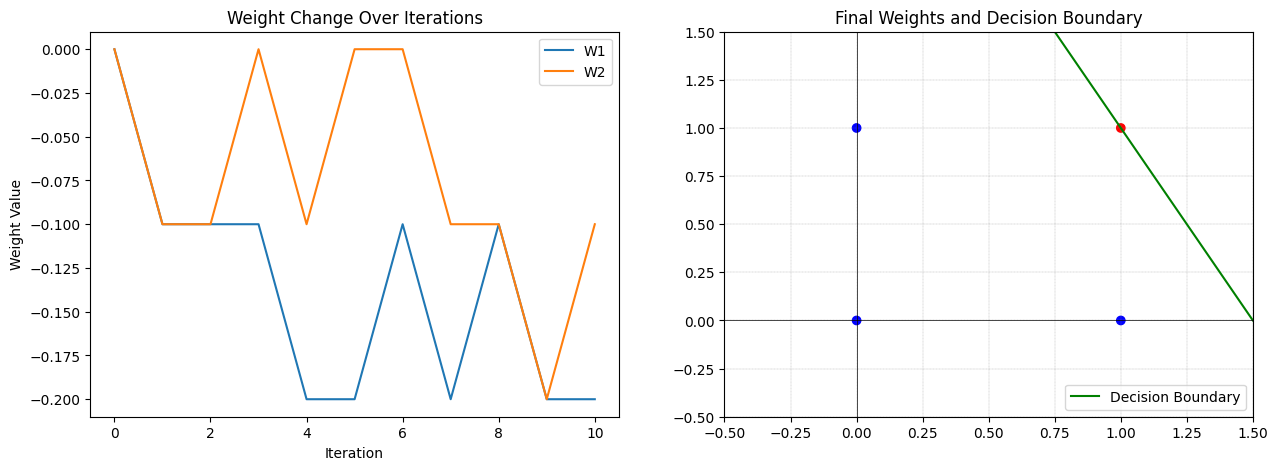

In [5]:
# 单层两输入单神经元解决AND、OR、NAND权值变化过程可视化，这个程序与上面程序权值更新逻辑一样，代码复杂性是由于增加可视化功能导致，非本章节关注点。

import numpy as np
import matplotlib.pyplot as plt

# 初始化
X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype='f')
#y = np.array([0.0, 0.0, 0.0, 1.0], dtype='f')  # AND逻辑
#y = np.array([0.0, 1.0, 1.0, 1.0], dtype='f')  # OR逻辑
y = np.array([1.0, 1.0, 1.0, 0.0], dtype='f')  # NAND逻辑
W = np.zeros(2, dtype='f')
bias = 0.0
lr = 0.1
sgn = lambda x: 1.0 if x > 0 else 0.0

# 训练过程
epoch = 0
max_epochs = 1000
all_correct = False
weights_history = []

while not all_correct and epoch < max_epochs:
    all_correct = True
    print(f"Epoch {epoch + 1}")
    
    for i in range(len(X)):
        # 计算加权和并应用激活函数
        net_input = np.dot(X[i], W) + bias
        out = sgn(net_input)
        
        # 打印当前状态
        print(f"Step {i+1}")
        print("当前权值与偏置：", W, f"偏置:{bias:.3f}")
        print("输入:", X[i], ", 期望输出:", y[i], ", 实际输出:", out)

        # 更新规则 - 感知机学习算法
        error = y[i] - out
        if error != 0:  # 如果有误差，则更新权重和偏置
            all_correct = False
            W += lr * error * X[i]
            bias += lr * error
            
            # 添加到历史记录
            weights_history.append((W.copy(), bias))
            
            # 打印修正后的权值和偏置
            print("修正后权值与偏置：", W, f"偏置: {bias:.3f}")
        print()

    epoch += 1
    
    if all_correct:
        print("所有样本均正确分类，训练结束。\n")
        break
else:
    print("达到最大训练轮次，训练结束。\n")

print("最终权值与偏置：", W, f"偏置: {bias:.3f}")

# 绘制权值变化过程
plt.figure(figsize=(15, 5))

# 子图1：权值变化过程
plt.subplot(1, 2, 1)
w_hist = np.array([wh[0] for wh in weights_history])
plt.plot(w_hist[:, 0], label="W1")
plt.plot(w_hist[:, 1], label="W2")
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight Change Over Iterations')
plt.legend()

# 子图2：最终权重、偏置的向量、超平面对各个输入向量的分隔情况
plt.subplot(1, 2, 2)

# 绘制输入点
colors = ['red' if yi == 0 else 'blue' for yi in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)

# 最终权重和偏置
final_W, final_bias = weights_history[-1]

# 超平面方程为 W[0]*x + W[1]*y + bias = 0
# 解出 y 的表达式用于绘制直线
x_values = np.linspace(-0.5, 1.5, 100)
y_values = (-final_W[0] * x_values - final_bias) / final_W[1]
plt.plot(x_values, y_values, 'g-', label='Decision Boundary')

plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.title('Final Weights and Decision Boundary')
plt.legend()

plt.show()

#### 能够自动学习的单层感知机，训练获得AND、OR、NAND逻辑反应能力（权值超平面移动动画）

In [6]:
# 单层、单神经元学习AND、OR、NAND逻辑响应，训练过程权值向量超平面分步动画可视化

import numpy as np
import matplotlib.pyplot as plt
from time import sleep
%matplotlib qt5

# 初始化
X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype='f')
y = np.array([0.0, 0.0, 0.0, 1.0], dtype='f')  # AND逻辑
W = np.zeros(2, dtype='f')
bias = 0.0
lr = 0.1
sgn = lambda x: 1.0 if x > 0 else 0.0

# 训练过程
epoch = 0
max_epochs = 100
all_correct = False
weights_history = []

# 准备绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-5.5, 5.5])
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.2)

# 绘制输入点
colors = ['red' if yi == 0 else 'blue' for yi in y]
scatter = ax.scatter(X[:, 0], X[:, 1], c=colors)

# 预先创建超平面线，并设置初始数据为不可见
x_values = np.linspace(-1.5, 1.5, 100)
y_values = np.zeros_like(x_values)  # 初始的y值可以是任意的，因为它们将被覆盖
(line,) = ax.plot(x_values, y_values, color='green', lw=2)

# 创建权值向量箭头
quiver = ax.quiver(0, 0, W[0], W[1], angles='xy', scale_units='xy', scale=1, color='orange')

def update_plot(w, b, step):
    """Update the plot with new weights and bias."""
    global line, quiver
    
    # 更新超平面
    if w[1] != 0:
        y_values = (-w[0] * x_values - b) / w[1]
    elif w[0] != 0:
        y_values = np.full_like(x_values, -b/w[0])
    else:
        y_values = np.full_like(x_values, 0)  # 如果权重都是0，默认为水平线
    
    line.set_data(x_values, y_values)
    
    # 更新权值向量箭头
    quiver.remove()
    quiver = ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='orange')
    
    fig.suptitle(f'Step {step}: Weights = {w}, Bias = {b:.2f}')
    
    # 更新图像以反映更改
    plt.draw()
    plt.pause(0.5)  # 暂停一段时间以便观察变化

while not all_correct and epoch < max_epochs:
    all_correct = True
    print(f"Epoch {epoch + 1}")
    
    for i in range(len(X)):
        net_input = np.dot(X[i], W) + bias
        out = sgn(net_input)
        
        print(f"Step {i+1}")
        print("当前权值与偏置：", W, f"偏置:, {bias:.3f}")
        print("输入:", X[i], ", 期望输出:", y[i], ", 实际输出:", out)

        error = y[i] - out
        if error != 0:
            all_correct = False
            W += lr * error * X[i]
            bias += lr * error
            
            # 添加到历史记录并更新绘图
            weights_history.append((W.copy(), bias))
            
            # 打印修正后的权值和偏置
            print("修正后权值与偏置：", W, f"偏置:, {bias:.3f}")
            print()
            
            # 更新绘图
            update_plot(W, bias, f"{epoch + 1}.{i + 1}")

            # 保存图像（可选）
            # plt.savefig(f'step_{epoch + 1}_{i + 1}.png')
        
        # 增加延时以便观察
        sleep(0.5)

    epoch += 1
    
    if all_correct:
        print("所有样本均正确分类，训练结束。\n")
        break
else:
    print("达到最大训练轮次，训练结束。\n")

print("最终权值与偏置：", W, f"偏置:, {bias:.3f}")

plt.show()

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


Epoch 1
Step 1
当前权值与偏置： [0. 0.] 偏置:, 0.000
输入: [0. 0.] , 期望输出: 0.0 , 实际输出: 0.0
Step 2
当前权值与偏置： [0. 0.] 偏置:, 0.000
输入: [0. 1.] , 期望输出: 0.0 , 实际输出: 0.0
Step 3
当前权值与偏置： [0. 0.] 偏置:, 0.000
输入: [1. 0.] , 期望输出: 0.0 , 实际输出: 0.0
Step 4
当前权值与偏置： [0. 0.] 偏置:, 0.000
输入: [1. 1.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [0.1 0.1] 偏置:, 0.100

Epoch 2
Step 1
当前权值与偏置： [0.1 0.1] 偏置:, 0.100
输入: [0. 0.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [0.1 0.1] 偏置:, 0.000

Step 2
当前权值与偏置： [0.1 0.1] 偏置:, 0.000
输入: [0. 1.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [0.1 0. ] 偏置:, -0.100

Step 3
当前权值与偏置： [0.1 0. ] 偏置:, -0.100
输入: [1. 0.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [0. 0.] 偏置:, -0.200

Step 4
当前权值与偏置： [0. 0.] 偏置:, -0.200
输入: [1. 1.] , 期望输出: 1.0 , 实际输出: 0.0
修正后权值与偏置： [0.1 0.1] 偏置:, -0.100

Epoch 3
Step 1
当前权值与偏置： [0.1 0.1] 偏置:, -0.100
输入: [0. 0.] , 期望输出: 0.0 , 实际输出: 0.0
Step 2
当前权值与偏置： [0.1 0.1] 偏置:, -0.100
输入: [0. 1.] , 期望输出: 0.0 , 实际输出: 1.0
修正后权值与偏置： [0.1 0. ] 偏置:, -0.200

Step 3
当前权值与偏置： [0.1 0. ] 偏置:, -0.200
输入: [1. 0.] , 期望输出: 

#### 使用pytorch包编写的单层感知机，解决AND、OR、NAND问题

In [9]:
# 使用pytorch包编写的单层感知机，解决AND、OR、NAND问题。为了使用自动反向推导，输出函数从阶跃函数改为可导的sigmod函数
# 使用专门的程序包，可以方便的建立各种神经网络，但因为封装其工作原理也越不直观。

import torch
import torch.nn as nn
import torch.optim as optim
from IPython.display import display, HTML

# 定义MP神经元类，使用Sigmoid激活函数
class MPNeuron(nn.Module):
    def __init__(self):
        super(MPNeuron, self).__init__()
        # 由于我们处理的是逻辑运算，权重和偏置可以通过学习得到
        self.linear = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        return self.activation(x)

# 训练函数
def train(model, data, targets, epochs=1000, lr=0.1):
    criterion = nn.BCELoss()  # 二分类交叉熵损失
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(data).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            #print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')
            display(HTML(f'<span style="color: #888888;">Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}</span>'))

# 测试函数
def test(model, data, targets):
    with torch.no_grad():
        outputs = model(data).squeeze()
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == targets).sum().item() / targets.size(0)
        print(f'Accuracy: {accuracy * 100:.2f}%')

# 准备数据集
data = torch.tensor([[0., 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# AND逻辑门的标签
targets_and = torch.tensor([0., 0., 0., 1.], dtype=torch.float32)

# OR逻辑门的标签
targets_or = torch.tensor([0., 1., 1., 1.], dtype=torch.float32)

# NAND逻辑门的标签
targets_nand = torch.tensor([1., 1., 1., 0.], dtype=torch.float32)

# 创建模型实例并训练
model = MPNeuron()

print("Training AND gate:")
train(model, data, targets_and)
test(model, data, targets_and)

print("\nTraining OR gate:")
train(model, data, targets_or)
test(model, data, targets_or)

print("\nTraining NAND gate:")
train(model, data, targets_nand)
test(model, data, targets_nand)

Training AND gate:


Accuracy: 100.00%

Training OR gate:


Accuracy: 100.00%

Training NAND gate:


Accuracy: 100.00%
